## We only conduct this experiment with red wine dataset to control outcome and get better results vis a vis weights initialization 

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('winequality-red.csv',sep=';')

In [44]:
print(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [53]:
print(df.isnull().sum())#%%

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [54]:
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [49]:
print("Unique values in each column \n",df.nunique())

Unique values in each column 
 fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


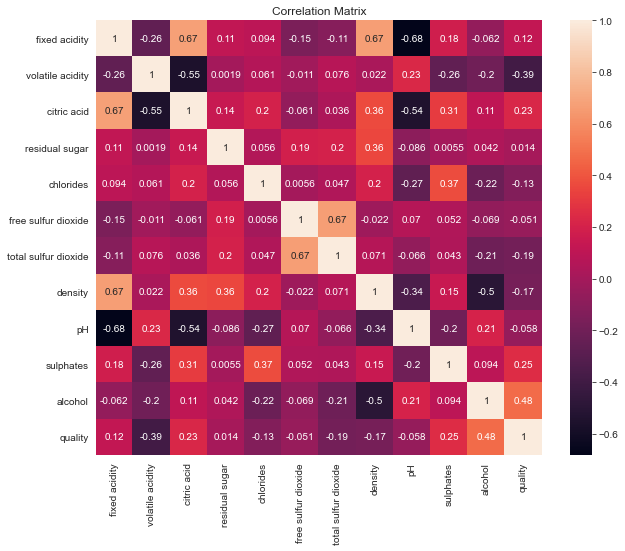

In [50]:
matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

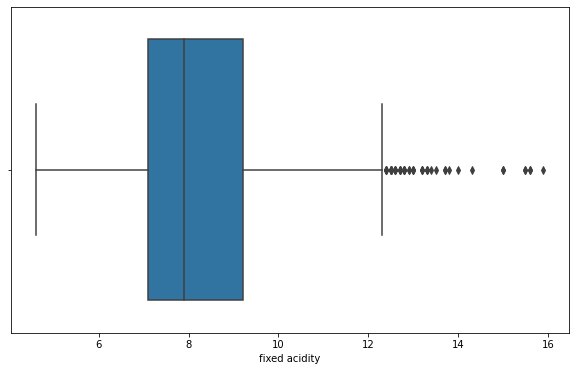

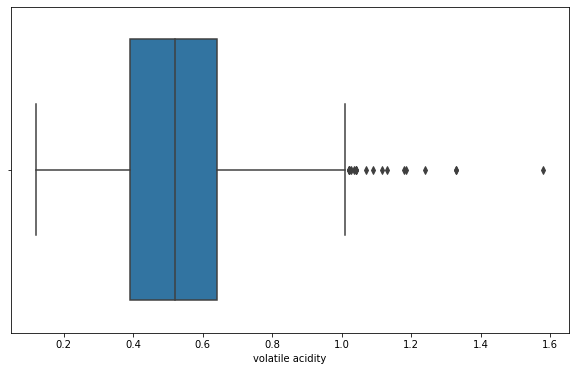

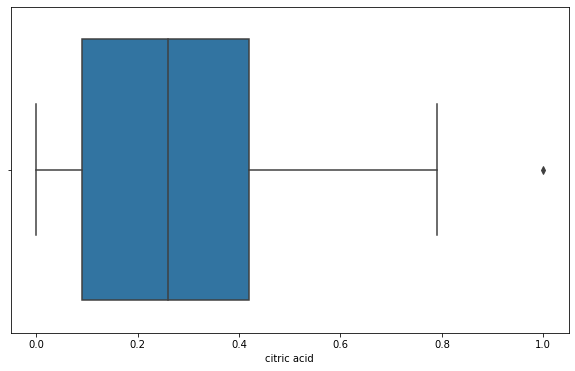

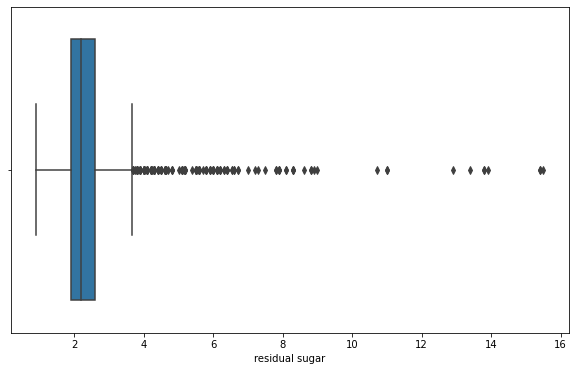

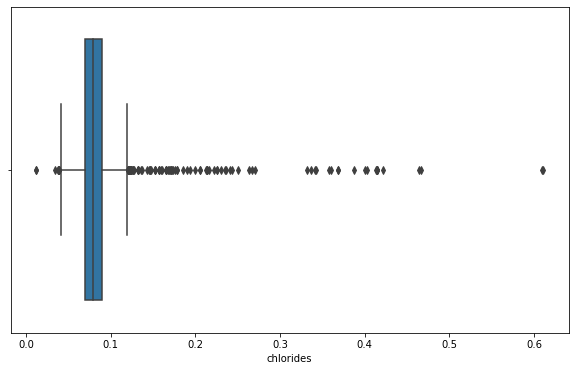

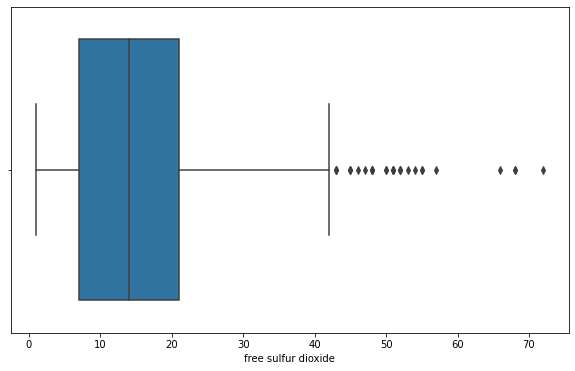

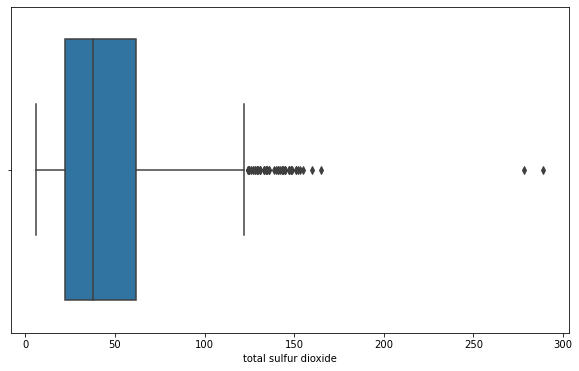

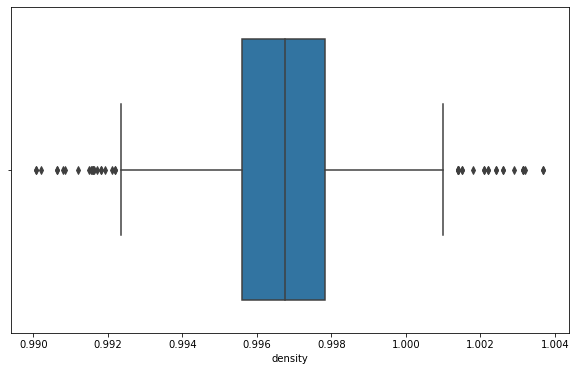

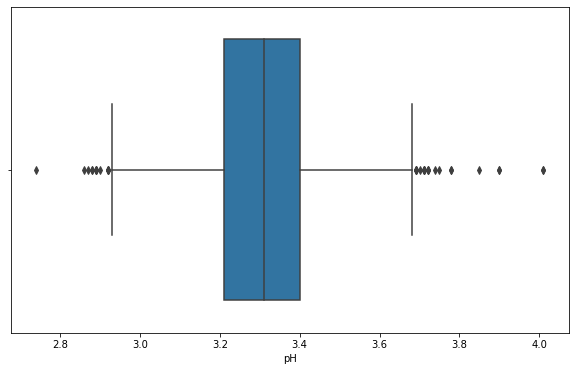

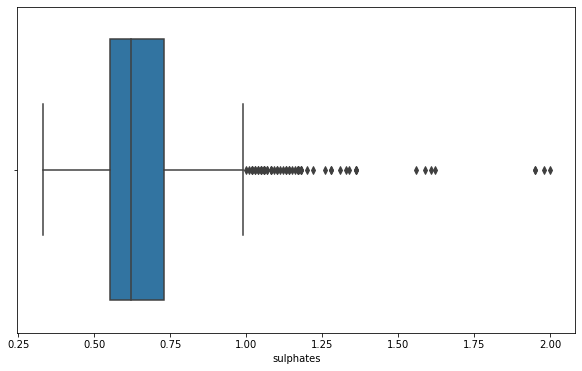

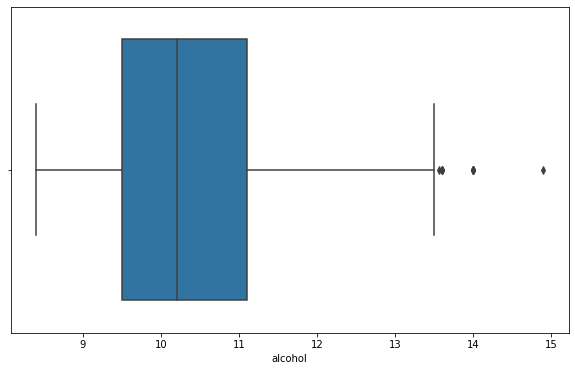

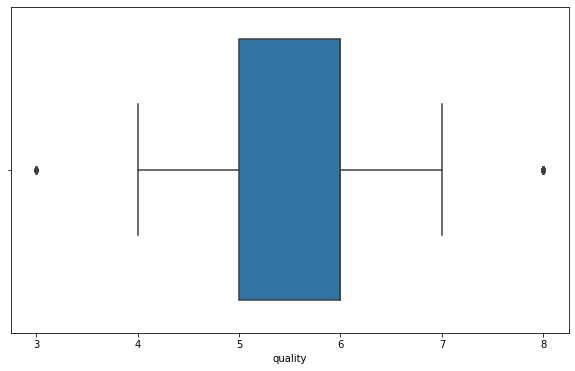

In [12]:
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[c])
    plt.show()

In [55]:
df_to_normalize = df.iloc[:,0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [56]:
normalized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [57]:
y = df.iloc[:,11:]

In [58]:
y.head()


,quality
0,5
1,5
2,5
3,6
4,5


In [59]:
df = df.sample(frac=1, random_state=42)

In [60]:
train_size = int(0.8 * len(df))  
train_df = df[:train_size]
test_df = df[train_size:]

In [61]:
df_to_normalize = train_df.iloc[:, 0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [62]:
train_df = pd.concat([normalized_df,train_df.iloc[:,11:]], axis=1)

In [63]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
803,-0.355786,0.183414,-0.990857,-0.021492,0.543054,-0.170699,-0.010939,0.176604,-0.454647,0.016447,-0.745816,6
124,-0.298762,-0.149254,-0.521368,-0.644662,-0.121563,0.501510,1.681218,-0.399532,0.511503,-1.074714,-0.839426,5
350,1.354930,0.793306,-0.260541,0.116990,0.397669,0.117391,-0.373544,1.905012,-0.197007,1.956288,-0.464987,6
682,0.100405,-0.371033,0.208947,-0.194595,-0.204640,1.557840,0.351666,0.647988,0.125043,-0.710994,-0.558597,5
1326,-0.926025,-0.371033,-0.156211,-0.575421,-0.225409,0.213421,-0.373544,-1.028044,0.511503,-0.347274,0.190281,6


In [64]:
X_train = train_df.drop('quality', axis=1)  
y_train = train_df['quality'] 

In [ ]:
## train spliting

In [65]:
df_to_normalize = test_df.iloc[:, 0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [66]:
train_df = pd.concat([normalized_df,test_df.iloc[:,11:]], axis=1)

In [67]:
X_test = test_df.drop('quality', axis=1)  
y_test = test_df['quality'] 

In [68]:
y_test_norm = (y_test - y_test.mean()) / y_test.std()

### We define the loss function

In [69]:
def compute_cost(X, y, theta, lambda_1, lambda_2):
    
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)  # Mean squared error
    
    # Elastic Net regularization: L1 (Lasso) + L2 (Ridge)
    l1_regularization = lambda_1 * np.sum(np.abs(theta))  # L1 norm
    l2_regularization = lambda_2 * np.sum(theta ** 2)  # L2 norm
    
    return cost + l1_regularization + l2_regularization


### Compute Gradient

In [70]:
def compute_gradient(X, y, theta, lambda_1, lambda_2):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    
    # Gradient of the cost function (mean squared error)
    gradient = (1 / m) * X.T.dot(error)
    
    # Gradient for L1 regularization (sub-gradient)
    l1_gradient = lambda_1 * np.sign(theta)
    
    # Gradient for L2 regularization
    l2_gradient = lambda_2 * theta
    
    # Combine gradients
    return gradient + l1_gradient + l2_gradient


### Compute Gradient  Descent

###  GD loop and random initilization

In [71]:
def check_stabilization(cost_history, tolerance=0.01):
    if len(cost_history) < 100:
        return False
    last_100_costs = cost_history[-100:]
    mean_cost = np.mean(last_100_costs)
    stabilized = np.all(np.abs(last_100_costs - mean_cost) < tolerance)
    return stabilized

In [72]:
def plot_cost_function(cost_history):
            plt.figure(figsize=(8,6))
            plt.plot(cost_history, label='Cost History')
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.title('Cost History over Iterations')
            plt.legend()
            plt.grid(True)
            plt.show()

In [74]:
gradient_threshold=1e-2
def elastic_net_batch_gradient_descent(X, y, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size):
    m, n = X.shape
    theta = np.random.randn(n)  # Initialize weights
    cost_history = []
    
    # Iterate for the given number of iterations
    for i in range(n_iterations):

        for j in range(0, m, batch_size):
            # Define mini-batch
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            
            # Compute gradients for the current batch
            gradients = compute_gradient(X_batch, y_batch, theta, lambda_1, lambda_2)
            if np.all(np.abs(gradients) < gradient_threshold):
                print(f"Gradient threshold reached. Stopping early at iteration {i}")
            # Update weights using the batch gradient
            theta -= learning_rate * gradients
            
        # Optionally, compute and store the cost after the full pass through the dataset
            
        cost = compute_cost(X, y, theta, lambda_1, lambda_2)
        cost_history.append(cost)
        if i%1000==0:
            print(f"cost {cost} at iteration {i}")
            
            
    
    return theta, cost_history


In [75]:
# Hyperparameters
alpha = 0.1
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta, cost_history = elastic_net_batch_gradient_descent(X_train, y_train, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)


cost 28.11254172282094 at iteration 0
cost 16.149153051935137 at iteration 1000
cost 16.149153092810263 at iteration 2000
cost 16.14915313422854 at iteration 3000
cost 16.149153051933503 at iteration 4000
cost 16.149153092810263 at iteration 5000
cost 16.14915313422854 at iteration 6000
cost 16.149153051933503 at iteration 7000
cost 16.149153092810263 at iteration 8000
cost 16.14915313422854 at iteration 9000


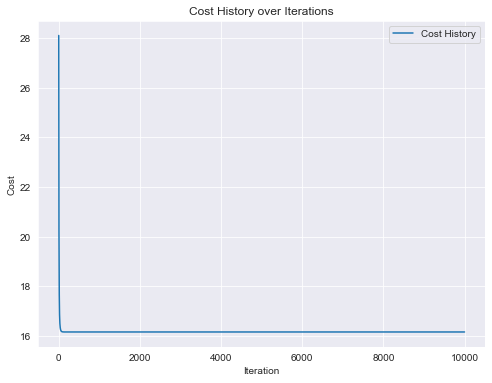

In [76]:
plot_cost_function(cost_history)

In [77]:
y_pred = np.dot(X_test.values,theta)
# m=X_test.shape[0]
mse = np.mean((y_test_norm-y_pred)**2)
print(f"Mean squared error: {mse:0.2f}")

Mean squared error: 4.17


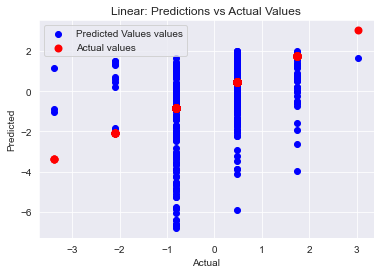

In [78]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

### With Zero Initialization

In [80]:
def elastic_net_batch_gradient_descent_with_zero_initialization(X, y, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size):
    m, n = X.shape
    theta=np.zeros(n)  # Initialize weights
    cost_history = []
    gradient_threshold = 1e-2
    break_flag = False
    for i in range(n_iterations):
        for j in range(0, m, batch_size):
            # Define mini-batch
            X_batch = X[j:j + batch_size]
            y_batch = y[j:j + batch_size]
            
            # Compute gradients for the current batch
            gradients = compute_gradient(X_batch, y_batch, theta, lambda_1, lambda_2)

            theta -= learning_rate * gradients
            
            if np.all(np.abs(gradients) < gradient_threshold):
                print(f"Gradient threshold reached. Stopping early at iteration {i}")
                break_flag=True
                break
        cost = compute_cost(X, y, theta, lambda_1, lambda_2)
        cost_history.append(cost)
        if i%1000==0:
            print(f"cost {cost} at iteration {i}")
        if break_flag==True:
            break
            
    return theta, cost_history


In [81]:
# Hyperparameters
alpha = 0.1
lambda_1 = alpha * 0.1  
lambda_2 = (1 - alpha) * 0.5  
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  

# Example data (X, y)
theta, cost_history = elastic_net_batch_gradient_descent_with_zero_initialization(X_train, y_train, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)


cost 16.19950653193306 at iteration 0
cost 16.149153134228165 at iteration 1000
cost 16.149153051933503 at iteration 2000
cost 16.149153092810263 at iteration 3000
cost 16.14915313422854 at iteration 4000
cost 16.149153051933503 at iteration 5000
cost 16.149153092810263 at iteration 6000
cost 16.14915313422854 at iteration 7000
cost 16.149153051933503 at iteration 8000
cost 16.149153092810263 at iteration 9000


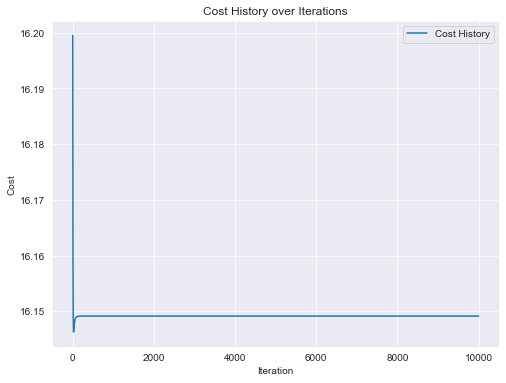

In [82]:
plot_cost_function(cost_history)

In [87]:
y_pred = np.dot(X_test.values,theta)
mse = np.mean((y_test_norm-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")
mse_zero_theta_outliers = mse

Mean squared error: 4.16904


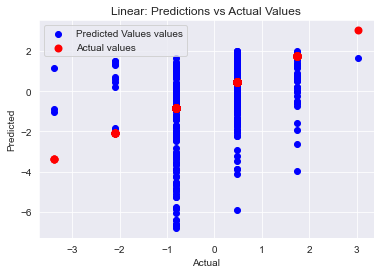

In [88]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

### Xavier Initialization

In [90]:
def compute_gradient_XAVIER_1(X_batch_X, y_batch_X, theta_XAV, lambda_1_XAV, lambda_2_XAV):
    m = X_batch_X.shape[0]
    predictions = X_batch_X.dot(theta_XAV)
    y_batch_X = y_batch_X.reshape((m, 1)) 
    errors = predictions - y_batch_X
    gradient = (2 / m) * X_batch_X.T.dot(errors) + lambda_1_XAV * np.sign(theta_XAV) + 2 * lambda_2_XAV * theta_XAV
    return gradient

In [89]:
## Xavier Initialization 
def xavier_initialization(input_dim):
    limit = np.sqrt(6 / input_dim)
    return np.random.uniform(-limit, limit, size=(input_dim, 1))

In [91]:
def compute_cost_XAVIER_1(X, y, theta, lambda_1, lambda_2):
    m = X.shape[0]
    predictions = X.dot(theta)
    y = y.reshape((m, 1))
    errors = predictions - y
    cost = (1 / m) * np.sum(errors**2) + lambda_1 * np.sum(np.abs(theta)) + lambda_2 * np.sum(theta**2)
    return cost

In [92]:
def elastic_net_batch_gradient_descent_with_XAVIER_initialization_1(X, y_XAVIER, alpha, lambda_1_XAVIER, lambda_2_XAVIER, learning_rate, n_iterations, batch_size):
    m = X.shape[0]
    n = X.shape[1]
    theta = xavier_initialization(n)  # Initialize weights
   
    cost_history = []
    gradient_threshold = 1e-2
    break_flag = False

    for i in range(n_iterations):
        for j in range(0, m, batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y_XAVIER[j:j + batch_size]
            
            # Compute gradients
            gradients = compute_gradient_XAVIER_1(X_batch, y_batch, theta, lambda_1_XAVIER, lambda_2_XAVIER)
            theta -= learning_rate * gradients
            
            if np.all(np.abs(gradients) < gradient_threshold):
                print(f"Gradient threshold reached. Stopping early at iteration {i}")
                break_flag = True
                break
        
        # Compute cost after full pass
        cost = compute_cost_XAVIER_1(X, y_XAVIER, theta, lambda_1_XAVIER, lambda_2_XAVIER)
        cost_history.append(cost)
        
        if i!=0 and i % n_iterations == 0:
            print(f"final cost  : {cost}")
        if break_flag:
            break
            
    return theta, cost_history

In [93]:
alpha = 0.1
lambda_1 = alpha * 0.1  
lambda_2 = (1 - alpha) * 0.5  
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  

# Example data (X, y)
theta, cost_history = elastic_net_batch_gradient_descent_with_XAVIER_initialization_1(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

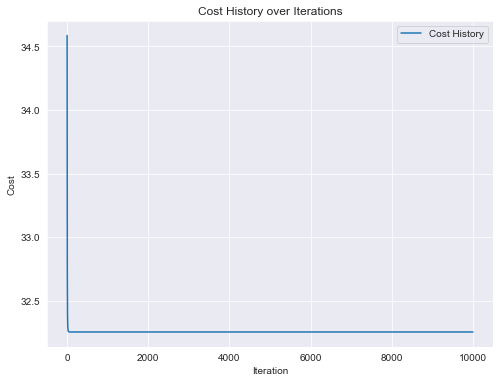

In [94]:
plot_cost_function(cost_history)

In [101]:
y_pred = np.dot(X_test.values,theta)
y_reshape = y_test_norm.values.reshape(len(y_test),1)
mse = np.mean((y_reshape-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")
mse_xavier_theta_outliers = mse

Mean squared error: 4.71719


### we remove the outliers and then start the process 

In [127]:
df_to_normalize = df.iloc[:, 0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [128]:
normalized_df.shape

(1599, 11)

In [129]:
from scipy import stats

In [130]:
df_zscore = normalized_df.apply(stats.zscore)

In [131]:
mask = (df_zscore.abs() <= 3).all(axis=1)
df_no_outliers = df[mask]

In [132]:
print(df_no_outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7             0.560         0.08            2.50      0.114   
124             7.8             0.500         0.17            1.60      0.082   
350            10.7             0.670         0.22            2.70      0.107   
682             8.5             0.460         0.31            2.25      0.078   
1326            6.7             0.460         0.24            1.70      0.077   
...             ...               ...          ...             ...        ...   
1130            9.1             0.600         0.00            1.90      0.058   
1294            8.2             0.635         0.10            2.10      0.073   
860             7.2             0.620         0.06            2.70      0.077   
1459            7.9             0.200         0.35            1.70      0.054   
1126            5.8             0.290         0.26            1.70      0.063   

      free sulfur dioxide  

In [133]:
df_no_outliers = df_no_outliers.sample(frac=1, random_state=42)

In [134]:
train_size = int(0.8 * len(df))  
train_df_beta = df_no_outliers[:train_size]
test_df_beta = df_no_outliers[train_size:]

In [135]:
df_to_normalize = train_df_beta.iloc[:, 0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [136]:
train_df_beta = pd.concat([normalized_df,train_df_beta.iloc[:,11:]], axis=1)


In [137]:
X_train = train_df_beta.drop('quality', axis=1)  
y_train = train_df_beta['quality'] 

In [ ]:
## test split

In [138]:
df_to_normalize = test_df_beta.iloc[:, 0:11]
normalized_df = (df_to_normalize - df_to_normalize.mean()) / df_to_normalize.std()

In [139]:
test_df_beta = pd.concat([normalized_df,test_df_beta.iloc[:,11:]], axis=1)


In [140]:
X_test = test_df_beta.drop('quality', axis=1)  
y_test = test_df_beta['quality'] 

In [141]:
y_test_norm = (y_test - y_test.mean()) / y_test.std()

In [142]:
y_test_norm.shape

(179,)

In [ ]:
## training tests 

### Random weights run

In [118]:
# Hyperparameters
alpha = 0.1
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta, cost_history = elastic_net_batch_gradient_descent(X_train, y_train, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

cost 33.81672353034255 at iteration 0
cost 16.21046011380562 at iteration 1000
cost 16.21046001300233 at iteration 2000
cost 16.21046011378821 at iteration 3000
cost 16.21046001300233 at iteration 4000
cost 16.21046011378821 at iteration 5000
cost 16.21046001300233 at iteration 6000
cost 16.21046011378821 at iteration 7000
cost 16.21046001300233 at iteration 8000
cost 16.21046011378821 at iteration 9000


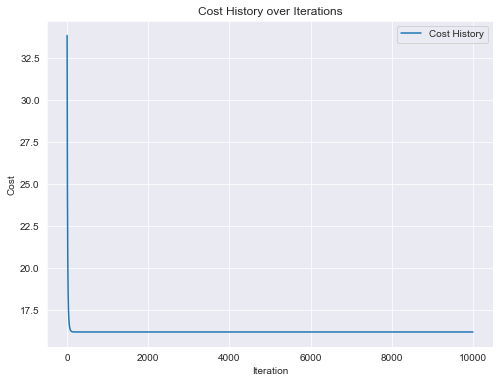

In [119]:
plot_cost_function(cost_history)

In [143]:
y_pred = np.dot(X_test.values,theta)
mse = np.mean((y_test_norm-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")

Mean squared error: 0.67109


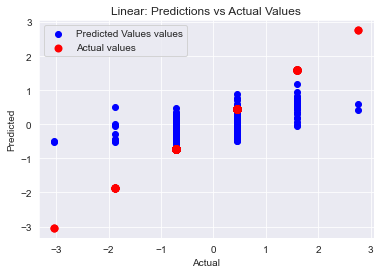

In [144]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

### With Zero Initialization

In [145]:
# Hyperparameters
alpha = 0.1
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta, cost_history = elastic_net_batch_gradient_descent_with_zero_initialization(X_train, y_train, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)


cost 16.26317354553202 at iteration 0
cost 16.210459961071155 at iteration 1000
cost 16.21046006408562 at iteration 2000
cost 16.21045996107146 at iteration 3000
cost 16.21046006408562 at iteration 4000
cost 16.21045996107146 at iteration 5000
cost 16.21046006408562 at iteration 6000
cost 16.21045996107146 at iteration 7000
cost 16.21046006408562 at iteration 8000
cost 16.21045996107146 at iteration 9000


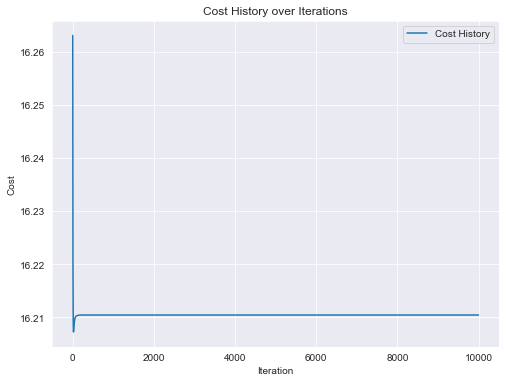

In [150]:
plot_cost_function(cost_history)

In [149]:
y_pred = np.dot(X_test.values,theta)
# m=X_test.shape[0]
mse = np.mean((y_test_norm-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")

Mean squared error: 0.67109


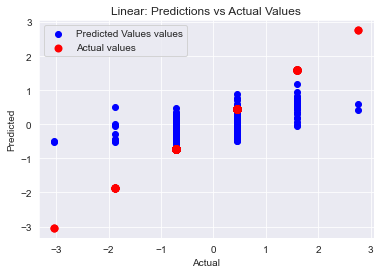

In [151]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

 : Theta [[ 0.0060395 ]
 [-0.10741301]
 [ 0.03297232]
 [-0.00734244]
 [-0.03534397]
 [ 0.01407742]
 [-0.06040637]
 [-0.11044764]
 [-0.02267517]
 [ 0.14543749]
 [ 0.2054926 ]] , alpha 0.017916435581119994, lamda1 : 0.0017916435581119994, lamda2 :0.49104178220944 cost : 32.3854803294281
 : Theta [[-0.00980319]
 [-0.11142831]
 [ 0.0310741 ]
 [-0.01827029]
 [-0.03845648]
 [ 0.01677858]
 [-0.05405642]
 [-0.12399463]
 [-0.01767958]
 [ 0.1487269 ]
 [ 0.21935508]] , alpha 0.15603589441722387, lamda1 : 0.015603589441722389, lamda2 :0.42198205279138806 cost : 32.399848867973915
 : Theta [[-0.00238939]
 [-0.10751208]
 [ 0.00761876]
 [-0.0091519 ]
 [-0.00946561]
 [ 0.0019074 ]
 [-0.0316734 ]
 [-0.02167728]
 [-0.01465222]
 [ 0.1465912 ]
 [ 0.28047584]] , alpha 0.9766838033436553, lamda1 : 0.09766838033436553, lamda2 :0.011658098328172328 cost : 32.396130594324426
 : Theta [[-0.01820333]
 [-0.10789817]
 [ 0.02221214]
 [-0.02699156]
 [-0.02645642]
 [ 0.0102894 ]
 [-0.03279988]
 [-0.08737756]
 [-0.018

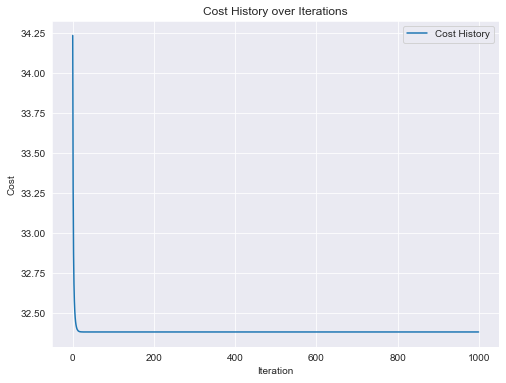

In [159]:
best_config=np.inf
best_alpha=None
best_lambda_1=None
best_lambda_2=None
best_cost_history=[]
best_theta=None
best_mse=None
for _ in range(1000):
    # Hyperparameters
    alpha = np.random.random()
    lambda_1 = alpha * 0.1  # L1 regularization strength
    lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
    learning_rate = np.random.random()*0.01
    n_iterations = 1000
    batch_size = 32  # Define batch size
    
    # Example data (X, y)
    theta, cost_history = elastic_net_batch_gradient_descent_with_XAVIER_initialization_1(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)
    print(f" : Theta {theta} , alpha {alpha}, lamda1 : {lambda_1}, lamda2 :{lambda_2} cost : {cost_history[-1]}")
    # plot_cost_function(cost_history)
    y_pred = np.dot(X_test.values,theta)
    y_reshape = y_test_norm.values.reshape(len(y_test),1)
    mse = np.mean((y_reshape-y_pred)**2)
    
    if mse < best_config:
        best_config=cost_history[-1]
        best_alpha=alpha
        best_lambda_1=lambda_1
        best_lambda_2=lambda_2
        best_cost_history=cost_history
        best_theta=theta
        best_mse=mse

print("\n\n")
print(f"Best config : Cost : {best_config}, best_alpha : {best_alpha}, best_lambda_1 : {best_lambda_1}, best_lambda_2 : {best_lambda_2} , best_mse : {best_mse}")
plot_cost_function(best_cost_history)

In [ ]:
### we extend run with higher number of iterations.

In [167]:
# Hyperparameters
alpha = 0.07228343553907901
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta_config_run, cost_history_config_run = elastic_net_batch_gradient_descent_with_XAVIER_initialization_1(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

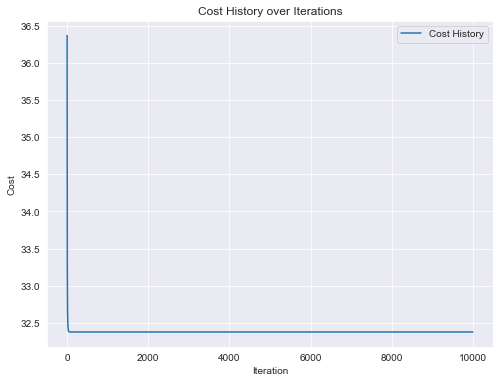

In [168]:
plot_cost_function(cost_history_config_run)

In [169]:
y_pred = np.dot(X_test.values,theta_config_run)
y_reshape = y_test_norm.values.reshape(len(y_test),1)
mse = np.mean((y_reshape-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")
mse_xavier_theta_non_outliers = mse 

Mean squared error: 0.66563


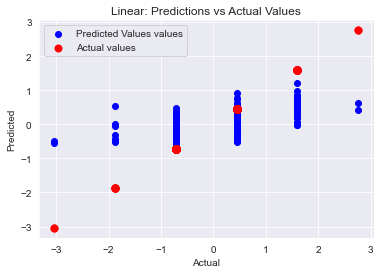

In [170]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

In [171]:
alpha = 0.1
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta_config_run, cost_history_config_run = elastic_net_batch_gradient_descent_with_XAVIER_initialization_1(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

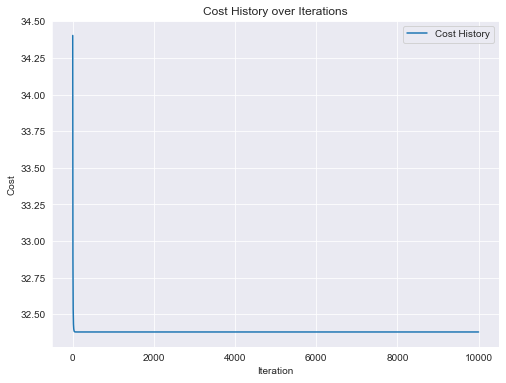

In [172]:
plot_cost_function(cost_history_config_run)

In [173]:
y_pred = np.dot(X_test.values,theta_config_run)
y_reshape = y_test_norm.values.reshape(len(y_test),1)
mse = np.mean((y_reshape-y_pred)**2)
print(f"Mean squared error: {mse:0.5f}")


Mean squared error: 0.66577


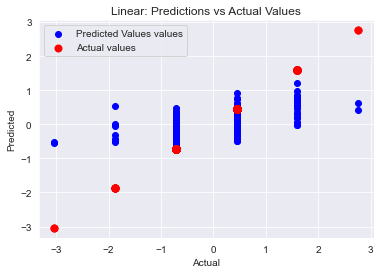

In [174]:
plt.scatter(y_test_norm, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test_norm, y_test_norm, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

In [189]:
def elastic_net_batch_gradient_descent_with_XAVIER_initialization_2(X, y_XAVIER, alpha, lambda_1_XAVIER, lambda_2_XAVIER, learning_rate, n_iterations, batch_size):
    m = X.shape[0]
    n = X.shape[1]
    theta = xavier_initialization(n)  # Initialize weights
   
    cost_history = []
    gradient_threshold = 1e-1
    break_flag = False
    i=0
    while True:
        for j in range(0, m, batch_size):
            X_batch = X[j:j + batch_size]
            y_batch = y_XAVIER[j:j + batch_size]
            
            # Compute gradients
            gradients = compute_gradient_XAVIER_1(X_batch, y_batch, theta, lambda_1_XAVIER, lambda_2_XAVIER)
            theta -= learning_rate * gradients
            if np.all(np.abs(gradients) < gradient_threshold):
                print(f"Gradient threshold reached. Stopping early at iteration {i}")
                break_flag = True
                break
        i+=1
        # Compute cost after full pass
        cost = compute_cost_XAVIER_1(X, y_XAVIER, theta, lambda_1_XAVIER, lambda_2_XAVIER)
        cost_history.append(cost)
        
        if i!=0 and i % n_iterations == 0:
            y_pred = np.dot(X_test.values,theta)
            y_reshape = y_test_norm.values.reshape(len(y_test),1)
            mse = np.mean((y_reshape-y_pred)**2)
            print(f"cost at iteration {i} : {cost} and Mean squared error: {mse}")
        if break_flag:
            break
            
    return theta, cost_history

In [190]:
# Hyperparameters
alpha = 0.07228343553907901
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.001
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta_config_run, cost_history_config_run = elastic_net_batch_gradient_descent_with_XAVIER_initialization_2(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

cost at iteration 10000 : 32.378467407652515 and Mean squared error: 0.6656290021562368
cost at iteration 20000 : 32.378467518412776 and Mean squared error: 0.6656295995973682
cost at iteration 30000 : 32.37846747069907 and Mean squared error: 0.6656293815358395
cost at iteration 40000 : 32.378467407652515 and Mean squared error: 0.6656290021562368
cost at iteration 50000 : 32.378467518412776 and Mean squared error: 0.6656295995973682
cost at iteration 60000 : 32.37846747069907 and Mean squared error: 0.6656293815358395
cost at iteration 70000 : 32.378467407652515 and Mean squared error: 0.6656290021562368
cost at iteration 80000 : 32.378467518412776 and Mean squared error: 0.6656295995973682
cost at iteration 90000 : 32.37846747069907 and Mean squared error: 0.6656293815358395
cost at iteration 100000 : 32.378467407652515 and Mean squared error: 0.6656290021562368
cost at iteration 110000 : 32.378467518412776 and Mean squared error: 0.6656295995973682
cost at iteration 120000 : 32.378

KeyboardInterrupt: 

In [191]:
# Hyperparameters
alpha = 0.07228343553907901
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.01
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta_config_run, cost_history_config_run = elastic_net_batch_gradient_descent_with_XAVIER_initialization_2(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

cost at iteration 10000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 20000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 30000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 40000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 50000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 60000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 70000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 80000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 90000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 100000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 110000 : 32.41531671564029 and Mean squared error: 0.6838843761023544
cost at iteration 120000 : 32.41531671564

KeyboardInterrupt: 

In [192]:
# Hyperparameters
alpha = 0.07228343553907901
lambda_1 = alpha * 0.1  # L1 regularization strength
lambda_2 = (1 - alpha) * 0.5  # L2 regularization strength
learning_rate = 0.009
n_iterations = 10000
batch_size = 32  # Define batch size

# Example data (X, y)
theta_config_run, cost_history_config_run = elastic_net_batch_gradient_descent_with_XAVIER_initialization_2(X_train.values, y_train.values, alpha, lambda_1, lambda_2, learning_rate, n_iterations, batch_size)

cost at iteration 10000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 20000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 30000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 40000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 50000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 60000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 70000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 80000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 90000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 100000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 110000 : 32.40855228381208 and Mean squared error: 0.6793937109656248
cost at iteration 120000 : 32.40855228381

KeyboardInterrupt: 